In [ ]:
# prompt: how to import the data from the pc to google colab

from google.colab import files
uploaded = files.upload()



Saving SalaryData_Train.csv to SalaryData_Train.csv


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('SalaryData_Train.csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.shape

(30161, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
df.value_counts()

age  workclass          education      educationno  maritalstatus        occupation        relationship     race                 sex      capitalgain  capitalloss  hoursperweek  native          Salary
33    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    16
35    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    15
39    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    14
51    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40            

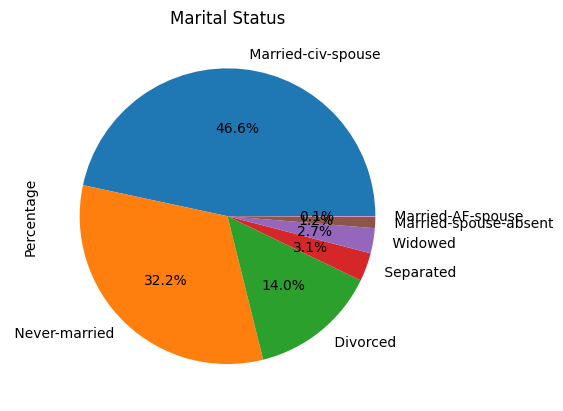

In [ ]:

 import matplotlib.pyplot as plt

df['maritalstatus'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Marital Status')
plt.ylabel('Percentage')
plt.show()


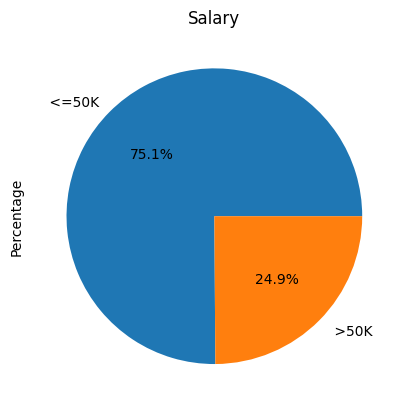

In [ ]:

 import matplotlib.pyplot as plt

df['Salary'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Salary')
plt.ylabel('Percentage')
plt.show()


In [ ]:
# prompt: label encoding for all object type columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_columns = df.select_dtypes(include=["object"]).columns

for column in categorical_columns:
  df[column] = le.fit_transform(df[column])

df.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [ ]:
# Splitting the data into x and y as input and output

X = df.iloc[:,0:13]
Y = df.iloc[:,13]
Y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int64

In [ ]:
# Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
clf=SVC()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy",acc)
confusion_matrix(y_test,y_pred)


Accuracy 0.7923527461597967


array([[6580,  218],
       [1661,  590]])

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC()
linear_svm.fit(x_train_scaled, y_train)
linear_predictions = linear_svm.predict(x_test_scaled)
linear_accuracy = accuracy_score(y_test, linear_predictions)
print(f"Linear Kernel Accuracy: {linear_accuracy:.2f}")

Linear Kernel Accuracy: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
poly_svm = SVC(kernel='poly', degree=3)  # You can adjust the degree parameter
poly_svm.fit(x_train_scaled, y_train)
poly_predictions = poly_svm.predict(x_test_scaled)
poly_accuracy = accuracy_score(y_test, poly_predictions)
print(f"Polynomial Kernel Accuracy: {poly_accuracy:.2f}")

Polynomial Kernel Accuracy: 0.84


In [ ]:
sigmoid_svm = SVC(kernel='sigmoid')
sigmoid_svm.fit(x_train_scaled, y_train)
sigmoid_predictions = sigmoid_svm.predict(x_test_scaled)
sigmoid_accuracy = accuracy_score(y_test, sigmoid_predictions)
print(f"Sigmoid Kernel Accuracy: {sigmoid_accuracy:.2f}")

Sigmoid Kernel Accuracy: 0.75


In [ ]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(x_train_scaled, y_train)
rbf_predictions = rbf_svm.predict(x_test_scaled)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
print(f"RBF Kernel Accuracy: {rbf_accuracy:.2f}")

RBF Kernel Accuracy: 0.84


In [ ]:
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
accuracies = [linear_accuracy, poly_accuracy, rbf_accuracy, sigmoid_accuracy]

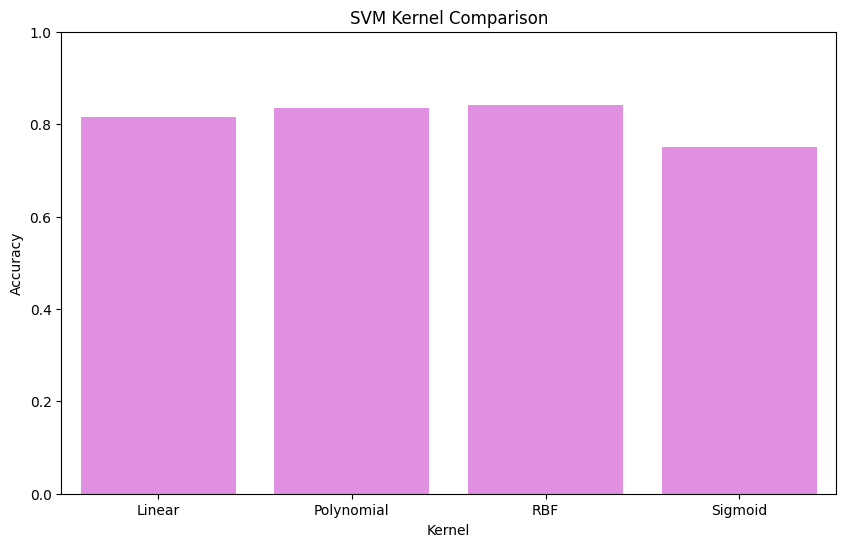

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=kernels, y=accuracies,color='violet')
plt.title('SVM Kernel Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


salary=pd.read_csv("SalaryData_Test.csv")

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [ ]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
# prompt: label encode for all the variables of  salary

le = LabelEncoder()

categorical_columns = salary.select_dtypes(include=["object"]).columns

for column in categorical_columns:
  salary[column] = le.fit_transform(salary[column])

salary.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [ ]:
salary.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [ ]:
#define x&y

X = salary.iloc[:,0:13]
Y = salary.iloc[:,13]

In [ ]:
# Splitting the data into training and test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)


In [ ]:
#model building by using SVM
clf=SVC()
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, Y_pred)

Accuracy = 79.6812749003984


array([[3290,   95],
       [ 823,  310]])

In [ ]:
Y_pred=clf.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.svm import SVC, LinearSVC


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
linear_svm = LinearSVC()
linear_svm.fit(X_train_scaled, Y_train.values.ravel())
linear_predictions = linear_svm.predict(X_test_scaled)
linear1_accuracy = accuracy_score(Y_test, linear_predictions)
print(f"Linear Kernel Accuracy: {linear_accuracy:.2f}")

Linear Kernel Accuracy: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
poly_svm = SVC(kernel='poly', degree=3)  # You can adjust the degree parameter
poly_svm.fit(X_train_scaled, Y_train)
poly_predictions = poly_svm.predict(X_test_scaled)
poly1_accuracy = accuracy_score(Y_test, poly_predictions)
print(f"Polynomial Kernel Accuracy: {poly_accuracy:.2f}")


Polynomial Kernel Accuracy: 0.84


In [ ]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_scaled, Y_train)
rbf_predictions = rbf_svm.predict(X_test_scaled)
rbf1_accuracy = accuracy_score(Y_test, rbf_predictions)
print(f"RBF Kernel Accuracy: {rbf_accuracy:.2f}")

RBF Kernel Accuracy: 0.84


In [ ]:
sigmoid_svm = SVC(kernel='sigmoid')
sigmoid_svm.fit(X_train_scaled, Y_train)
sigmoid_predictions = sigmoid_svm.predict(X_test_scaled)
sigmoid1_accuracy = accuracy_score(Y_test, sigmoid_predictions)
print(f"Sigmoid Kernel Accuracy: {sigmoid_accuracy:.2f}")

Sigmoid Kernel Accuracy: 0.75


In [ ]:
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
accuracies = [linear1_accuracy, poly1_accuracy, rbf1_accuracy, sigmoid1_accuracy]

In [ ]:
import  matplotlib.pyplot as plt
import seaborn as sns

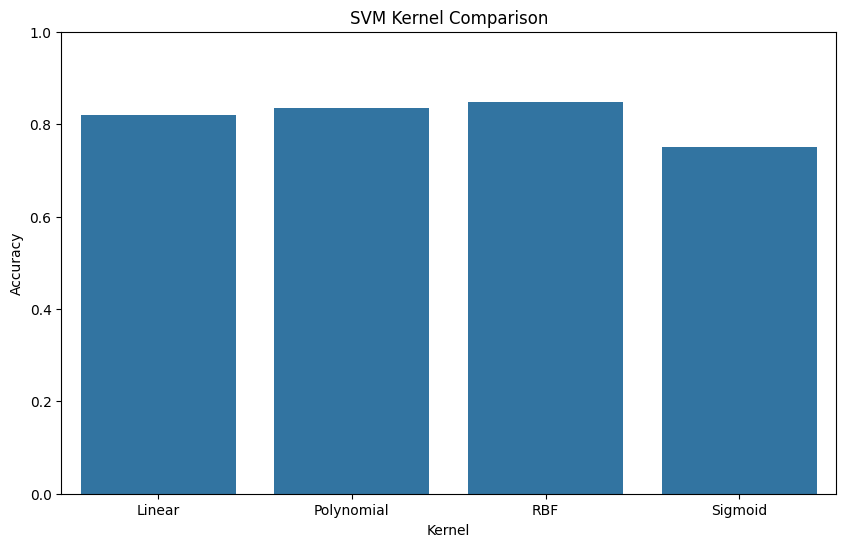

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=kernels, y=accuracies)
plt.title('SVM Kernel Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

2)  **Classify** **the** **Size_Categorie** **using SVM**



In [1]:
# prompt: how to import the data from the pc to google colab

from google.colab import files
uploaded = files.upload()



Saving forestfires.csv to forestfires.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df=pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.shape

(517, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.isnull().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [7]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

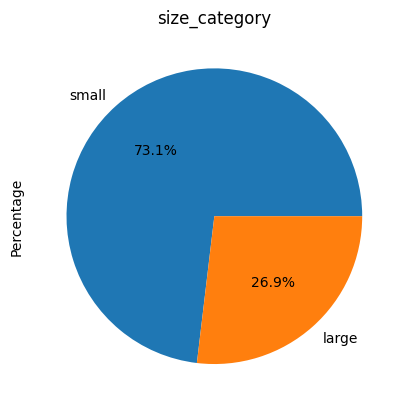

In [9]:

import matplotlib.pyplot as plt

df['size_category'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('size_category')
plt.ylabel('Percentage')
plt.show()


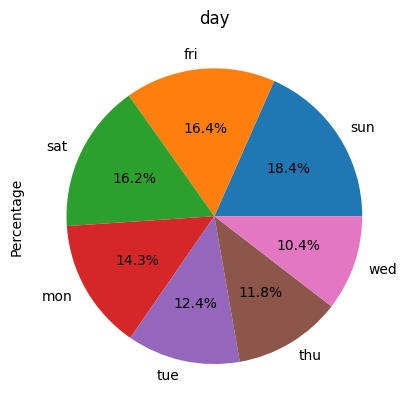

In [10]:

import matplotlib.pyplot as plt

df['day'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('day')
plt.ylabel('Percentage')
plt.show()


<ipython-input-36-4670f583e616>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


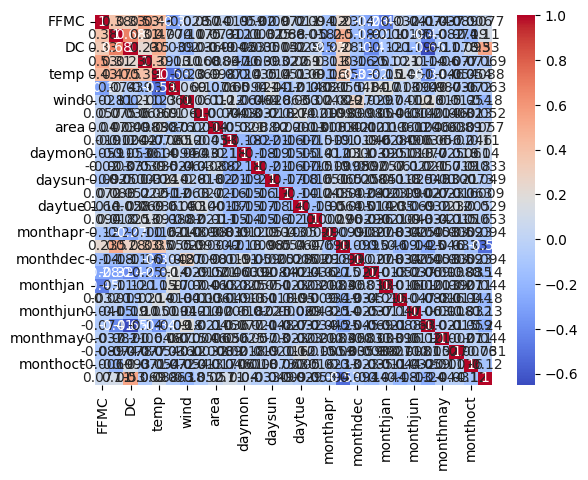

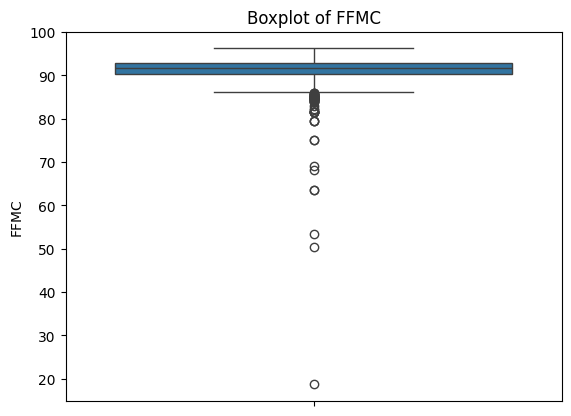

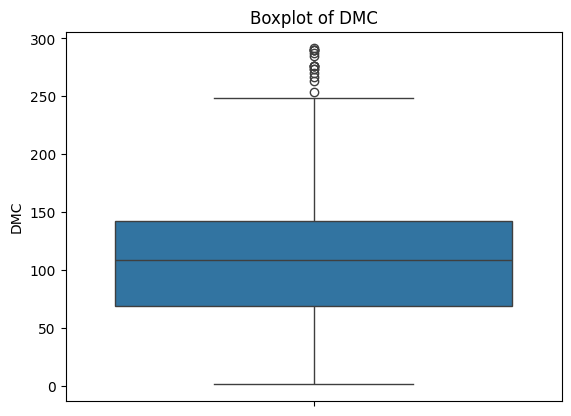

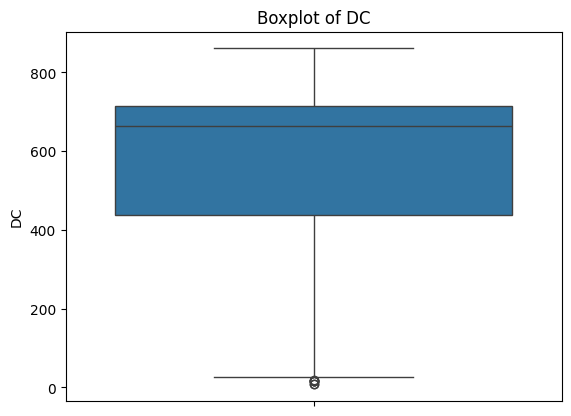

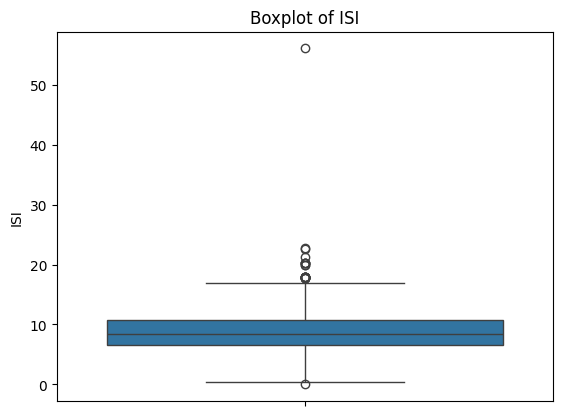

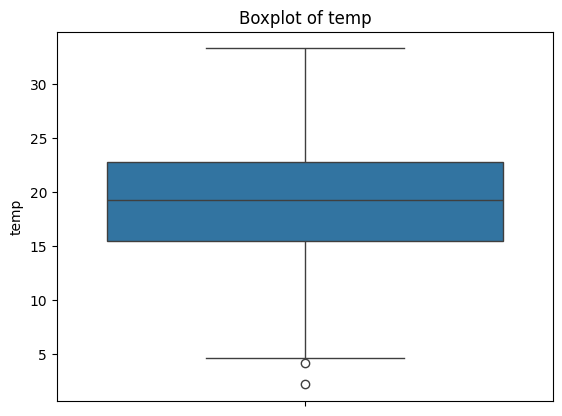

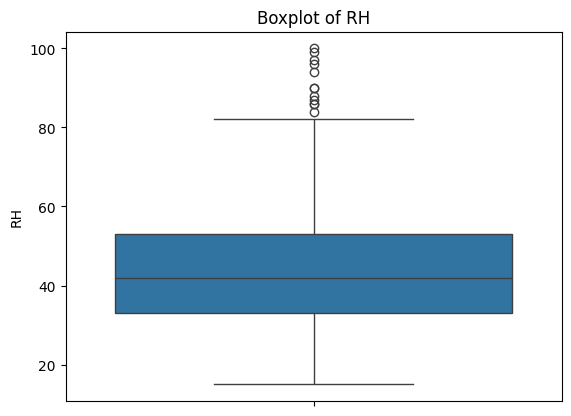

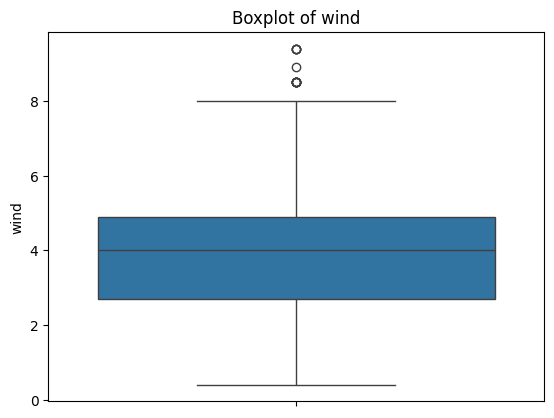

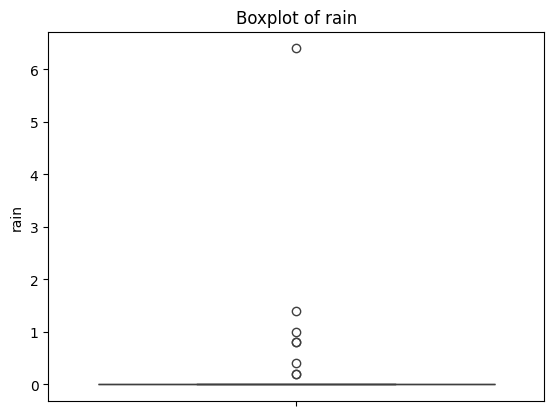

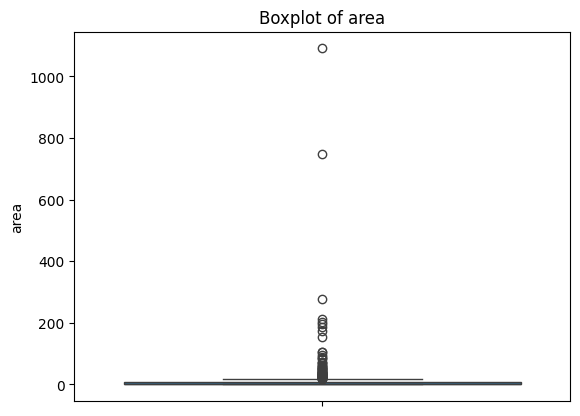

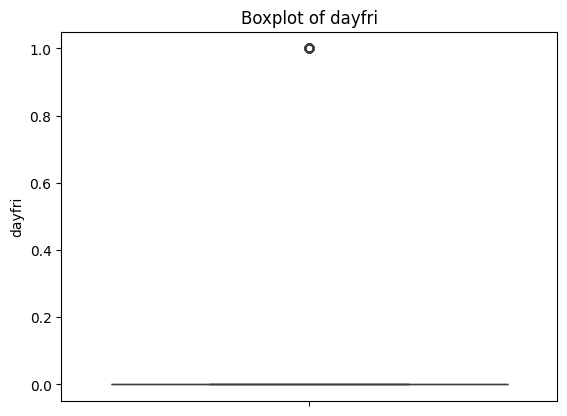

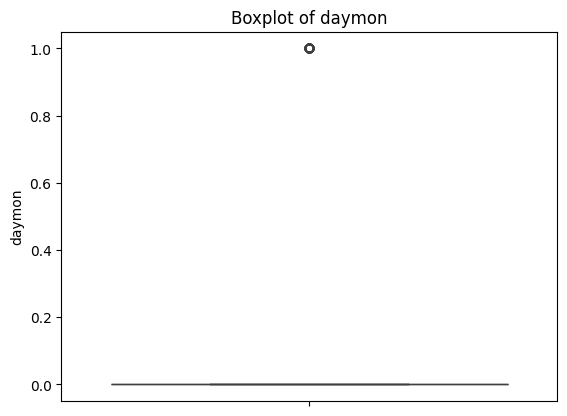

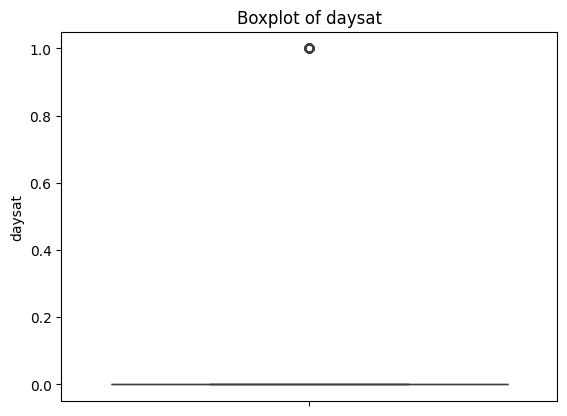

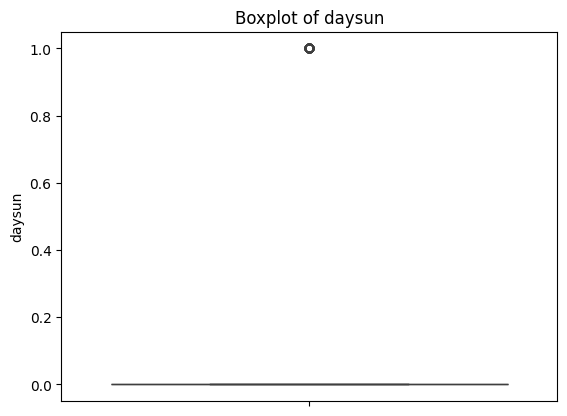

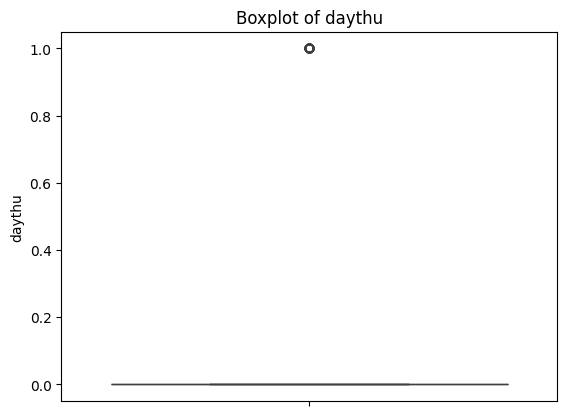

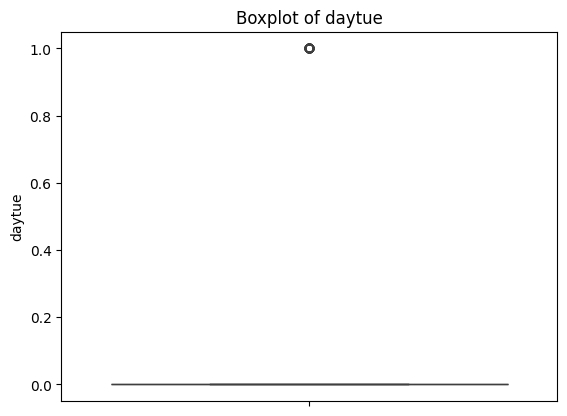

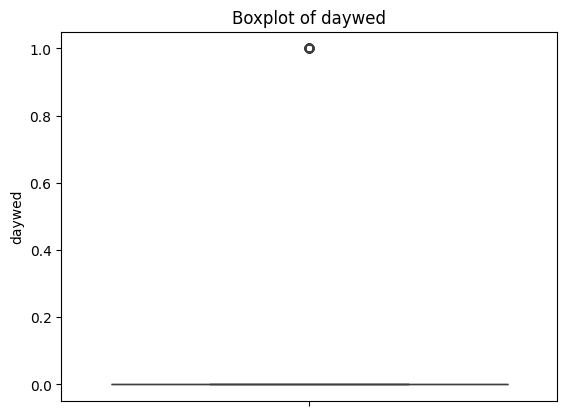

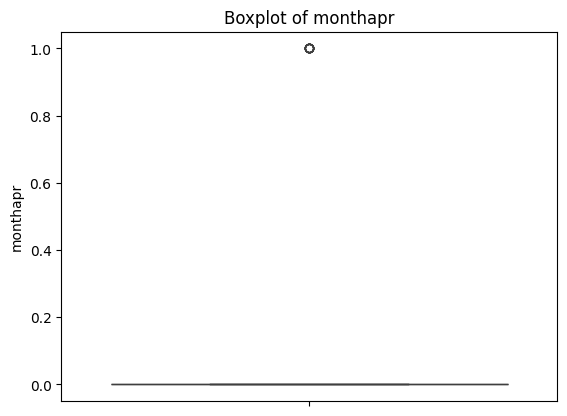

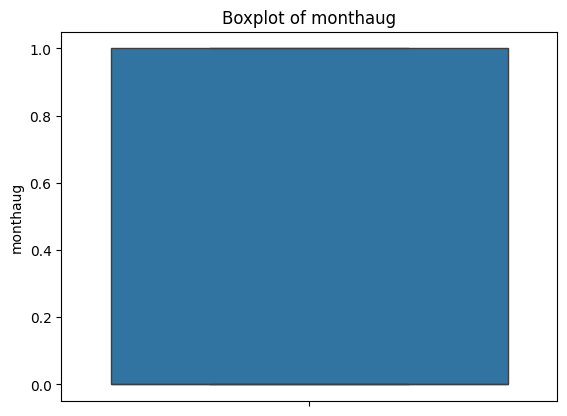

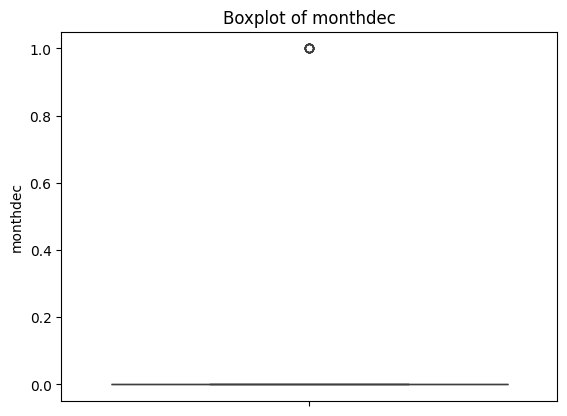

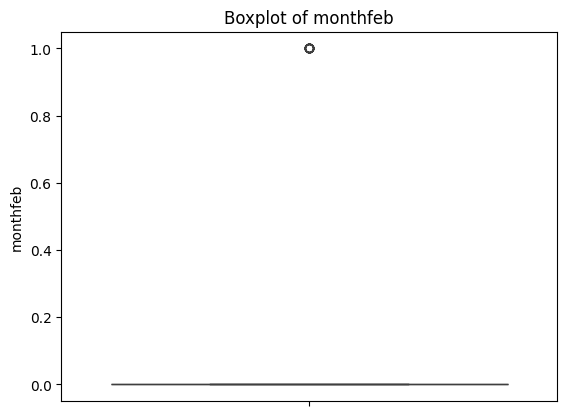

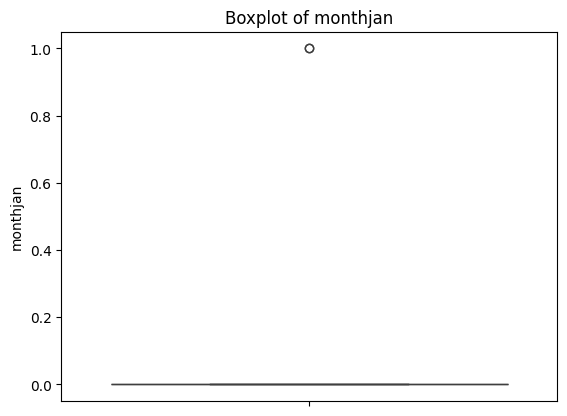

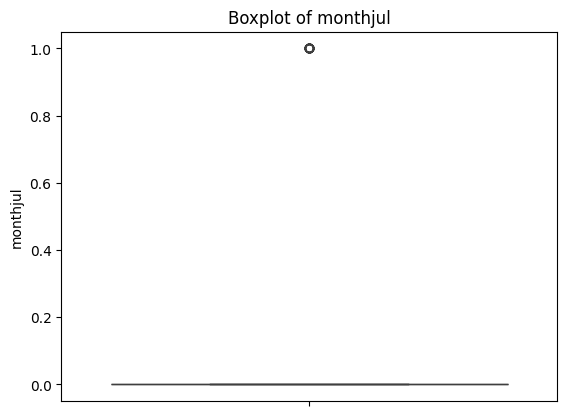

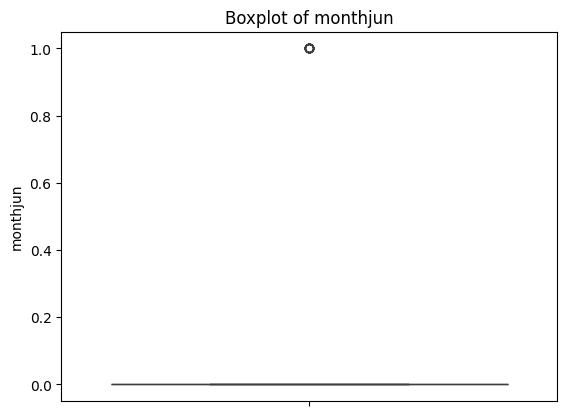

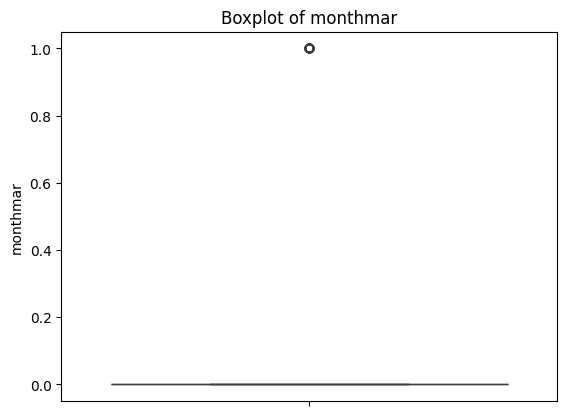

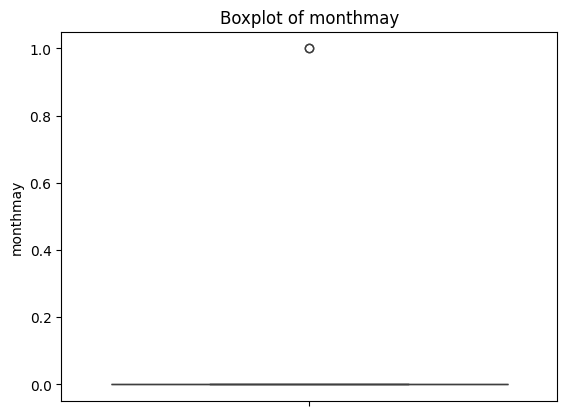

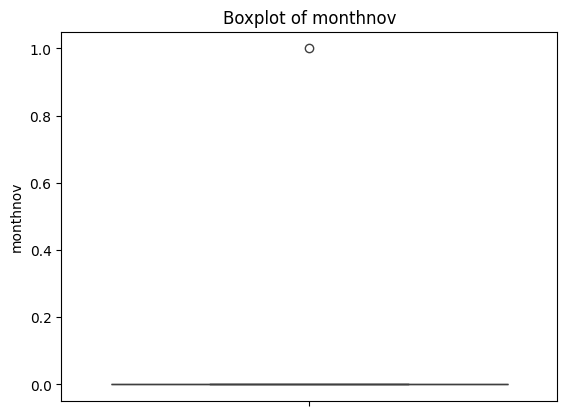

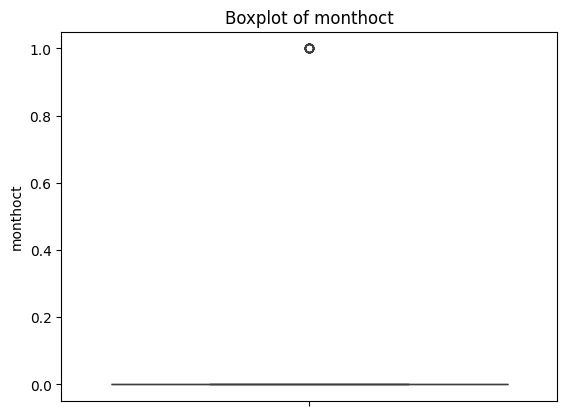

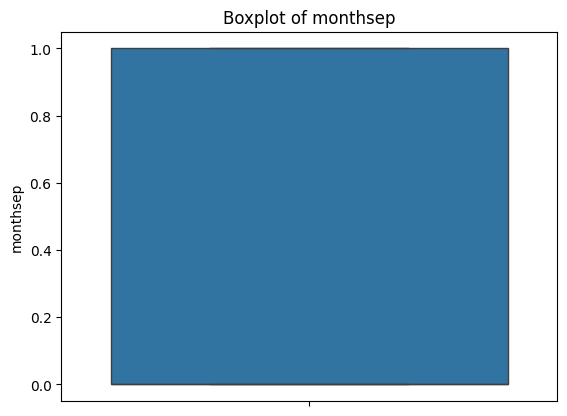

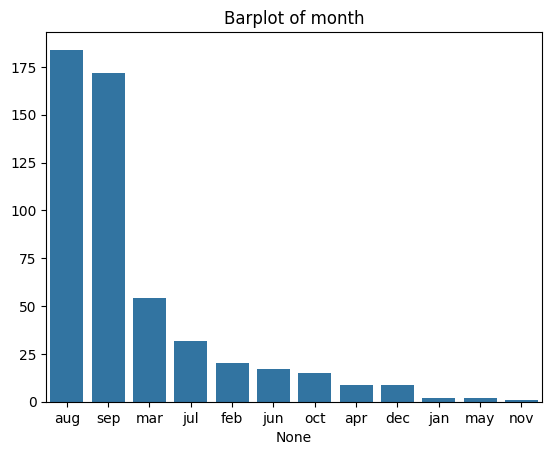

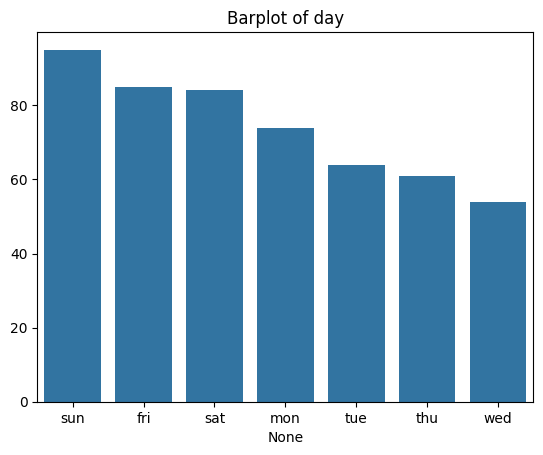

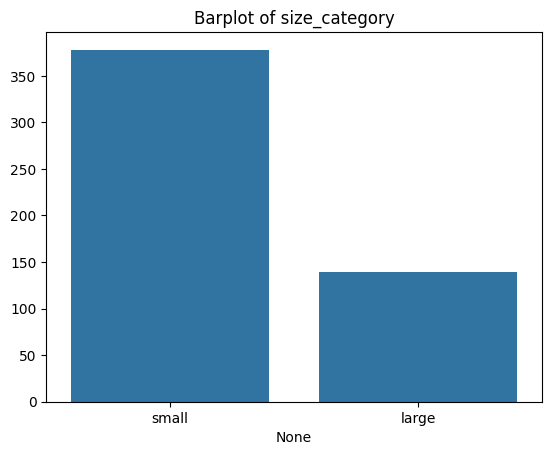

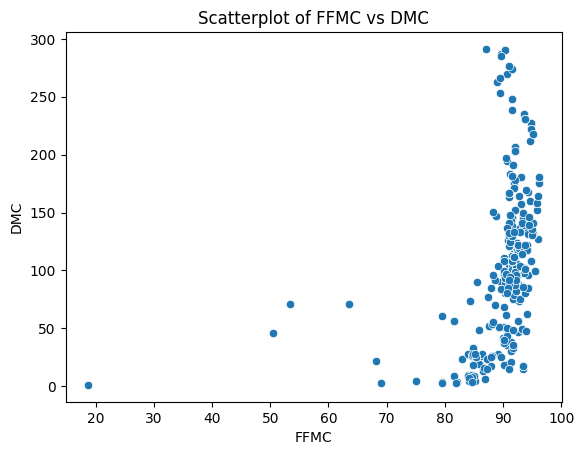

In [ ]:
# prompt: all neccesary graph for above df
import seaborn as sns
# 1) **Correlation Matrix**

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

# 2) **Boxplots for Numerical Features**

numerical_features = df.select_dtypes(include=["int64", "float64"])

for column in numerical_features:
  sns.boxplot(y=df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()

# 3) **Barplots for Categorical Features**

categorical_features = df.select_dtypes(include=["object"])

for column in categorical_features:
  sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values)
  plt.title(f"Barplot of {column}")
  plt.show()

# 4) **Scatterplot for Numerical Features**


sns.scatterplot(x="FFMC", y="DMC", data=df)
plt.title("Scatterplot of FFMC vs DMC")
plt.show()

# 5) **Lineplot for Temporal Data**

if "date" in df.columns:
  df["date"] = pd.to_datetime(df["date"])
  sns.lineplot(x="date", y="temperature", data=df)
  plt.title("Lineplot of Temperature over Time")
  plt.show()


In [11]:
Y=df['size_category']
x=df.iloc[:,2:30]
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [13]:
# prompt: label encode all object variables

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the object columns
for col in df.select_dtypes(include='object'):
  # Fit the encoder to the data
  le.fit(df[col])
  # Transform the data
  df[col] = le.transform(df[col])

# Print the transformed dataframe
print(df)


     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  \
0        7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...   
1       10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...   
2       10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...   
3        7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...   
4        7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...   
512      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...   
513      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...   
514      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...   
515      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...   
516      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1     

In [ ]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
#define x&y

X = df.iloc[:,0:31]
Y = df['size_category']

In [16]:
# Splitting the data into training and test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)


In [24]:
#model building by using SVM
clf=SVC()
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, Y_pred)

Accuracy = 72.43589743589743


array([[  3,  43],
       [  0, 110]])

In [25]:
Y_pred=clf.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [26]:
from sklearn.svm import SVC, LinearSVC


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
linear_svm = LinearSVC()
linear_svm.fit(X_train_scaled, Y_train.values.ravel())
linear_predictions = linear_svm.predict(X_test_scaled)
linear_accuracy = accuracy_score(Y_test, linear_predictions)
print(f"Linear Kernel Accuracy: {linear_accuracy:.2f}")

Linear Kernel Accuracy: 1.00


In [29]:
poly_svm = SVC(kernel='poly', degree=3)  # You can adjust the degree parameter
poly_svm.fit(X_train_scaled, Y_train)
poly_predictions = poly_svm.predict(X_test_scaled)
poly_accuracy = accuracy_score(Y_test, poly_predictions)
print(f"Polynomial Kernel Accuracy: {poly_accuracy:.2f}")


Polynomial Kernel Accuracy: 0.93


In [31]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_scaled, Y_train)
rbf_predictions = rbf_svm.predict(X_test_scaled)
rbf_accuracy = accuracy_score(Y_test, rbf_predictions)
print(f"RBF Kernel Accuracy: {rbf_accuracy:.2f}")

RBF Kernel Accuracy: 0.98


In [32]:
sigmoid_svm = SVC(kernel='sigmoid')
sigmoid_svm.fit(X_train_scaled, Y_train)
sigmoid_predictions = sigmoid_svm.predict(X_test_scaled)
sigmoid_accuracy = accuracy_score(Y_test, sigmoid_predictions)
print(f"Sigmoid Kernel Accuracy: {sigmoid_accuracy:.2f}")

Sigmoid Kernel Accuracy: 1.00


In [33]:
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
accuracies = [linear_accuracy, poly_accuracy, rbf_accuracy, sigmoid_accuracy]

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

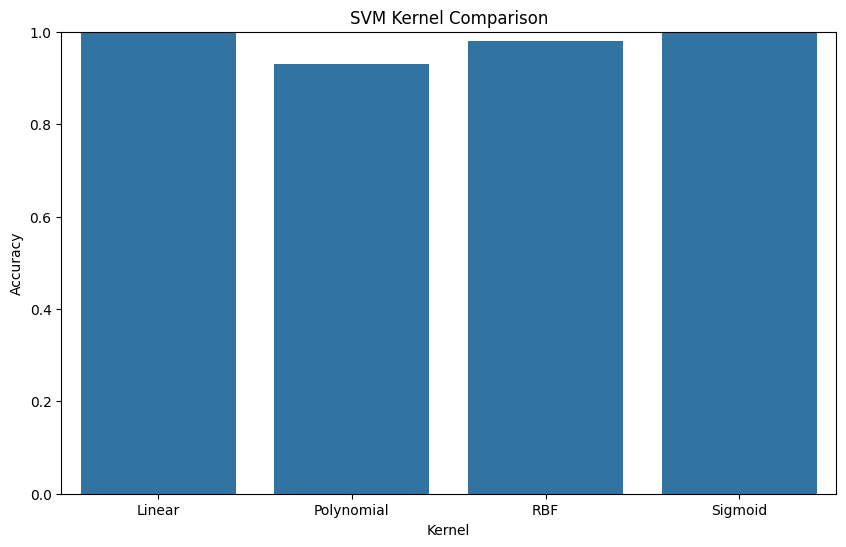

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=kernels, y=accuracies)
plt.title('SVM Kernel Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()